In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("sixth(1000).csv")

In [3]:
df.head()

,Person ID,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Blood Pressure 1,Blood Pressure 2,Heart Rate,Daily Steps,BMI Levels,Occupation,Gender
0,1,10,8.0,41,1,8,126,82,95,7000,2,Software Engineer,Female
1,2,8,7.0,44,1,6,138,74,66,9000,2,Accountant,Female
2,3,8,7.0,31,3,5,123,68,76,4000,3,Salesperson,Female
3,4,10,8.0,36,2,6,131,76,74,6000,2,Sales Representative,Female
4,5,10,8.0,37,3,3,103,67,89,7000,2,Lawyer,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1000 non-null   int64  
 1   Sleep Duration           1000 non-null   int64  
 2   Quality of Sleep         1000 non-null   float64
 3   Age                      1000 non-null   int64  
 4   Physical Activity Level  1000 non-null   int64  
 5   Stress Level             1000 non-null   int64  
 6   Blood Pressure 1         1000 non-null   int64  
 7   Blood Pressure 2         1000 non-null   int64  
 8   Heart Rate               1000 non-null   int64  
 9   Daily Steps              1000 non-null   int64  
 10  BMI Levels               1000 non-null   int64  
 11  Occupation               1000 non-null   object 
 12  Gender                   1000 non-null   object 
dtypes: float64(1), int64(10), object(2)
memory usage: 101.7+ KB


In [5]:
df.isnull().sum()

Person ID                  0
Sleep Duration             0
Quality of Sleep           0
Age                        0
Physical Activity Level    0
Stress Level               0
Blood Pressure 1           0
Blood Pressure 2           0
Heart Rate                 0
Daily Steps                0
BMI Levels                 0
Occupation                 0
Gender                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.rename(columns={'BMI Levels': 'BMI Category'}, inplace=True)

In [8]:
# Person ID -> irrelevant column

df.drop(columns=["Person ID"], inplace=True)

In [9]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [10]:
# i will apply it in the merge with all the files

# encoder = OneHotEncoder(sparse_output=False)
# occupation_encoded = encoder.fit_transform(df[["Occupation"]])
# occupation_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(["Occupation"]))

# df.drop(columns=["Occupation"], inplace=True)
# df = pd.concat([df.reset_index(drop=True), occupation_df], axis=1)

In [11]:
df["BMI Category"].value_counts()

BMI Category
3    355
1    336
2    309
Name: count, dtype: int64

In [12]:
# Convert "Blood Pressure 1" ("126") and "Blood Pressure 2" ("82") to "Blood Pressure" ("126/82")

df['Blood Pressure'] = df['Blood Pressure 1'].astype(str) + '/' + df['Blood Pressure 2'].astype(str)

In [13]:
df = df.drop(columns=["Blood Pressure 1", "Blood Pressure 2"])

In [14]:
# Convert "Blood Pressure Ratio" from string ("126/82") to numeric (1.51)
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda df: eval(df) if isinstance(df, str) else df)

In [15]:
df.head()

,Sleep Duration,Quality of Sleep,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Occupation,Gender,Blood Pressure
0,10,8.0,41,1,8,95,7000,2,Software Engineer,0,1.536585
1,8,7.0,44,1,6,66,9000,2,Accountant,0,1.864865
2,8,7.0,31,3,5,76,4000,3,Salesperson,0,1.808824
3,10,8.0,36,2,6,74,6000,2,Sales Representative,0,1.723684
4,10,8.0,37,3,3,89,7000,2,Lawyer,0,1.537313


array([[<Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>,
        <Axes: title={'center': 'BMI Category'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Blood Pressure'}>, <Axes: >, <Axes: >]],
      dtype=object)

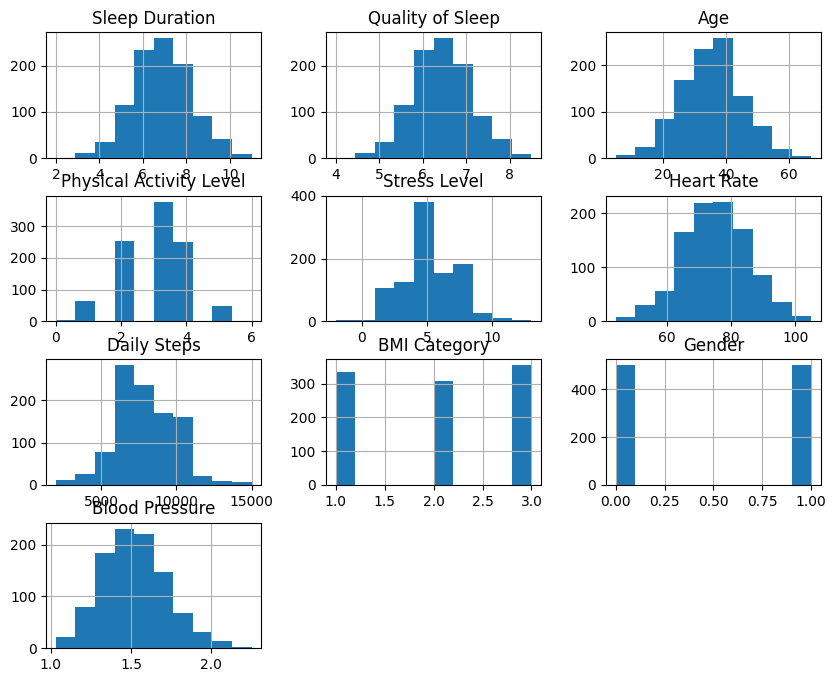

In [16]:
df.hist(figsize=(10, 8))

In [17]:
# we do not have outliers
# =======================

numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }

    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

for col, info in outliers.items():
    print(f"\nOutlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")


Outlier Analysis for: Sleep Duration
Q1: 6.0, Q3: 8.0, IQR: 2.0
Lower Bound: 3.0, Upper Bound: 11.0
Number of Outliers: 1
Outliers: [2]


Outlier Analysis for: Quality of Sleep
Q1: 6.0, Q3: 7.0, IQR: 1.0
Lower Bound: 4.5, Upper Bound: 8.5
Number of Outliers: 1
Outliers: [4.]


Outlier Analysis for: Age
Q1: 28.0, Q3: 41.0, IQR: 13.0
Lower Bound: 8.5, Upper Bound: 60.5
Number of Outliers: 7
Outliers: [67  7 61  7  5 62 61]


Outlier Analysis for: Physical Activity Level
Q1: 2.0, Q3: 4.0, IQR: 2.0
Lower Bound: -1.0, Upper Bound: 7.0
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Stress Level
Q1: 4.0, Q3: 6.0, IQR: 2.0
Lower Bound: 1.0, Upper Bound: 9.0
Number of Outliers: 23
Outliers: [-1 10 12 13 10 11  0 11  0 12  0 -1 10  0 10 10 -2 10 10 -2 10 10  0]


Outlier Analysis for: Heart Rate
Q1: 68.0, Q3: 82.0, IQR: 14.0
Lower Bound: 47.0, Upper Bound: 103.0
Number of Outliers: 5
Outliers: [ 46 104  44 105 105]


Outlier Analysis for: Daily Steps
Q1: 7000.0, Q3: 9000.0, IQR: 200

In [18]:
df.to_csv('sixth_clean.csv', index=False)